# SUPERVISED CLASSIFICATION - kNN ALGORITHM

### GOAL: Show supervised classification on the example of kNN algorithm

In [1]:
# Import the necessary modules

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [2]:
# Set the number of nearest neighbors to consider ("k" in kNN)

n_neighbors = 15

# Import the Iris dataset. It is conveniently embedded in sklearn. Neat!
iris = datasets.load_iris()

# Take the first two features
X = iris.data[:, :2]
y = iris.target

In [3]:
# We will classify every point in space

h = .02  # step size in the mesh


In [4]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

xx shape: (371, 309)
xx shape: (371, 309)


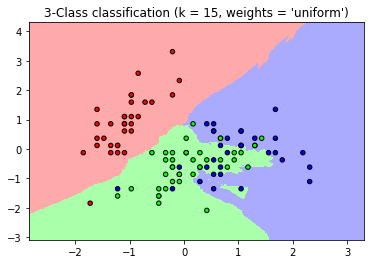

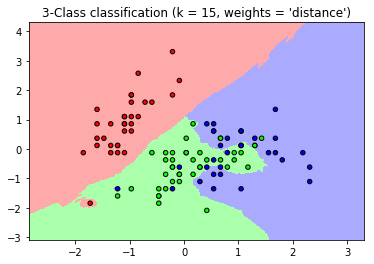

(371, 309)

In [9]:
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    print("xx shape: {0}".format(xx.shape))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.show()

In [11]:
pred = clf.predict(X_test)


In [13]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred))

[[18  0  0]
 [ 0  9  1]
 [ 0  8  9]]


In [14]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       0.53      0.90      0.67        10
          2       0.90      0.53      0.67        17

avg / total       0.86      0.80      0.80        45



# What is Precision and Recall?

![TP, TN, FP, FN image](Precisionrecall.png)

# What is f1 score?

## f1 = 2 x Precision x Recall / (Precision + Recall)

# What is support?

## Simply the number of samples of that class in y_test

## In fact, there is a continuum between supervised and unsupervised classification. When only part of the data is labeled - we use semi-supervised classification. 
## One idea: to cluster unlabeled data and assign to points  in each cl